<a target="_blank" href="https://colab.research.google.com/github/TuragaLab/jhu-janelia-ml-demo/blob/main/latent_diffusion_upscaler.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
!pip install -U diffusers accelerate

### Imports

In [ ]:
import torch
from PIL import Image
import requests
from io import BytesIO

from diffusers import LDMSuperResolutionPipeline

In [ ]:
pipe = LDMSuperResolutionPipeline.from_pretrained( "CompVis/ldm-super-resolution-4x-openimages")
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/248 [00:00<?, ?B/s]

vqvae/diffusion_pytorch_model.safetensors not found


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

vqvae/config.json:   0%|          | 0.00/713 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/873 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/221M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--ldm-super-resolution-4x-openimages/snapshots/0b55ddf931a8e3a1b426b3a50ddcf325ff84f668/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--ldm-super-resolution-4x-openimages/snapshots/0b55ddf931a8e3a1b426b3a50ddcf325ff84f668/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--ldm-super-resolution-4x-openimages/snapshots/0b55ddf931a8e3a1b426b3a50ddcf325ff84f668/vqvae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--ldm-super-resolution-4x-openimages/snapshots/0b55ddf931a8e3a1b426b3a50ddcf325ff84f668/vqvae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


This notebook demonstrates using a diffusion model to perform image superresolution, i.e. taking an image with few pixels and increasing the number of pixels while using the neural network to fill in details.

Below, we show an example image that we download and make a low resolution (few pixels) version of. We also show the original high resolution image in full detail.

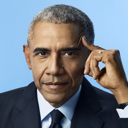

In [ ]:
# let's download an  image
url = "https://images.ctfassets.net/l7h59hfnlxjx/582Lx8AhvXHgRLXagk73lV/ef827f6b381202b112b61e218d8e3154/President_Obama_Headshot__Economic_Inclusion___Photo_by_Pari_Dukovic_courtesy_of_Penguin_Random_House_.jpg"
response = requests.get(url)
high_res_img = Image.open(BytesIO(response.content)).convert("RGB")
low_res_img = high_res_img.resize((128, 128))
low_res_img

In [ ]:
high_res_img

Now, let's run the superresolution model to get a higher resolution image given just the low resolution image as input. This is a generative model, so we can get multiple random samples of the superresolution result. Here, we generate 4:

In [ ]:
# run pipeline in inference (sample random noise and denoise)
upscaled_images = []
for i in range(4):
  upscaled_images.append(pipe(low_res_img, num_inference_steps=100, eta=1).images[0])

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
for im in upscaled_images:
  im.show()

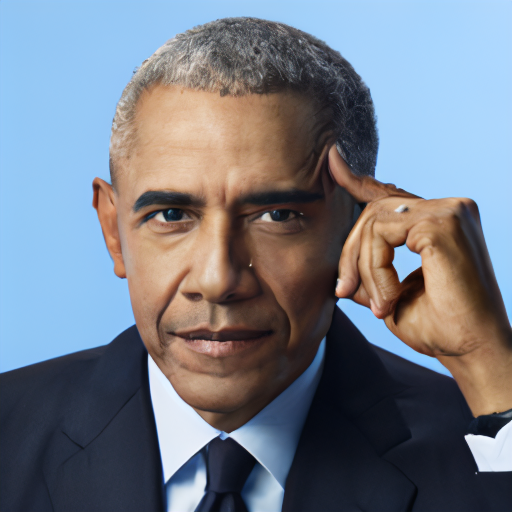

In [ ]:
upscaled_images[0]

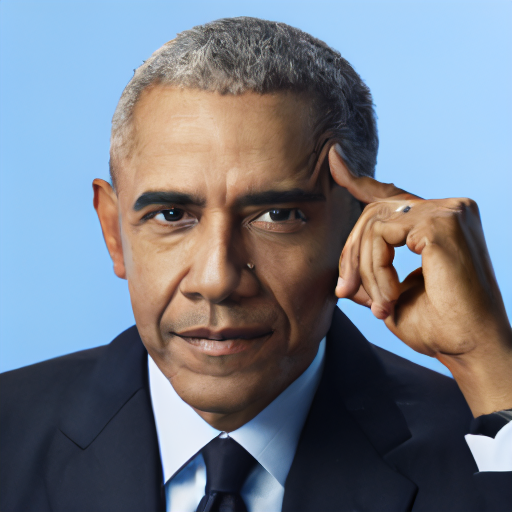

In [ ]:
upscaled_images[1]

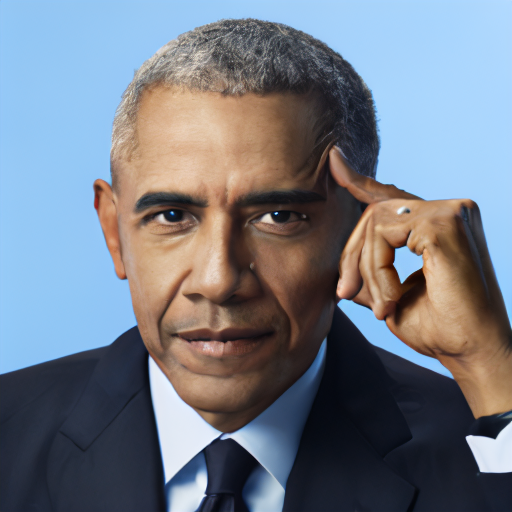

In [ ]:
upscaled_images[2]

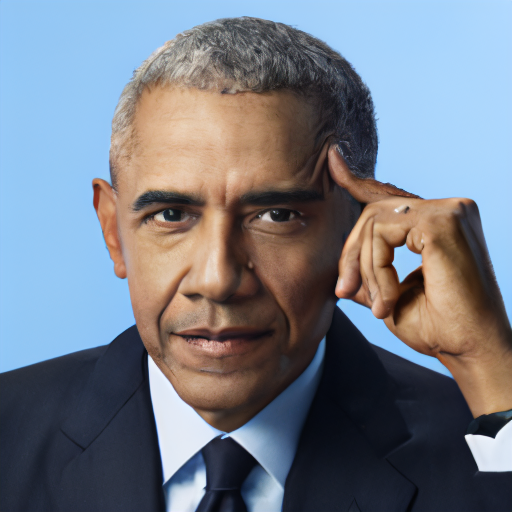

In [ ]:
upscaled_images[3]

Note how we see 4 images that are broadly the same and have more pixels than the original input, but with very different details. For example, pay attention to the rings or moles!

Do you trust the superresolution result? Why do you think this happens? When would you use a model like this and when would you not?